In [1]:
import os, sys

import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
plt.rc('mathtext', fontset="cm")
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
  sys.path.append(module_path)

from utils.utils import Create_Similarity_Model

sns.set_style('whitegrid')
sns.set_context("talk")

2022-07-20 15:19:50.238861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-20 15:19:50.238876: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Now we will create our model

In [2]:
n_nonsimilar = 1
n_similar = 1

### We will look for similarity in the last n_similar parameters of the inputs.

## Load the MVP data for high enough Re

In [3]:
dfSB75k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re75000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB150k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re150000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB230k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re230000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB310k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re310000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB410k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re410000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB540k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re540000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB750k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re750000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB1M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re1000000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB1M300k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re1300000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB1M700k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re1700000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB2M300k_M=pd.read_csv("../../Data/McKeon Data/turb2/Re2300000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB3M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re3000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB4M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re4000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB6M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re6000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB7M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re7000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB10M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re10000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB13M_M=pd.read_csv("../../Data/McKeon Data/turb2/Re13000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])

dfs = [dfSB75k_M, dfSB150k_M, dfSB230k_M, dfSB310k_M, dfSB410k_M, dfSB540k_M, dfSB750k_M, dfSB1M_M, dfSB1M300k_M]
#dfs = [dfSB2M300k_M, dfSB3M_M, dfSB4M_M, dfSB6M_M, dfSB7M_M, dfSB10M_M, dfSB13M_M]
Re_tau = []
Y_ = []
U_ = []
possible_re_tau = [1824.7, 3327.4, 5108.6, 6617.4, 8536.6, 10914.0, 14849.0, 19778.0, 25278.0]
#possible_re_tau = [4.229500e+004, 5.453000e+004, 7.647800e+004, 1.022e+005, 1.279200e+005, 1.657e+005, 2.169800e+005]
dic_x = {}
dic_y = {}

for i in range(len(possible_re_tau)):
    possible_y = dfs[i]["y+"].values
    possible_u = dfs[i]["U+"].values
    for j in range(len(possible_y)):                                                                    
        if 3 * (possible_re_tau[i] ** (1 / 2)) < possible_y[j] < 0.2 * possible_re_tau[i]:              ### REGION WE WILL LOOK FOR LOG LAYER
            Y_.append(possible_y[j])
            U_.append(possible_u[j])
            Re_tau.append(possible_re_tau[i])

c = list(zip(Y_, Re_tau, U_))
random.shuffle(c)
Y_, Re_tau, U_ = zip(*c)

Y_ = np.log(Y_)
Re_tau = np.log(Re_tau)

dic_x['y+'] = Y_
dic_x['re_tau'] = Re_tau
dic_y['u+'] = np.array(U_)

nonsimilar_keys = ['y+']

xtrain = pd.DataFrame.from_dict(dic_x).values
ytrain = pd.DataFrame.from_dict(dic_y).values

0.12406445023331651
0.16774259354226387
0.20625546157346872
0.23628289600672742
0.26839485700054705
0.30348398829699064
0.35399022272234537
0.40847794031964363
0.4356296216059095


In [4]:
loss = 'mean_squared_error'
optimizer = 'adam'
best_loss = 50.0
n_fits = 50                       # Number of model fits we will try to perform
n_epochs_initial = 100           # Number of epochs we will train inside the loop
n_epochs_final = 10000            # Number of epochs we will train after convergence is established
successfull_tries = 0
models = []

# model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
# model.compile(loss = loss, optimizer = optimizer)
# model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 2)

while successfull_tries < n_fits:
    model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
    model.compile(loss = loss, optimizer = optimizer)
    model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 0)
    current_loss = model.evaluate(xtrain, ytrain, verbose = 0)
    if current_loss < 100:
        successfull_tries += 1
        model.fit(xtrain, ytrain, epochs = n_epochs_final, verbose = 0)
        good_loss = model.evaluate(xtrain, ytrain, verbose = 0)
        models.append(model)
        print("Iteration " + str(successfull_tries) + ": current loss = " + str(good_loss))
        if good_loss < best_loss:
            best_model = model
            best_loss = good_loss
    

2022-07-20 11:43:12.312749: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-20 11:43:12.313105: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-20 11:43:12.313146: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-20 11:43:12.313183: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-20 11:43:12.313218: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Iteration 1: current loss = 0.026298683136701584
Iteration 2: current loss = 0.004868502728641033
Iteration 3: current loss = 0.019363373517990112
Iteration 4: current loss = 0.01875019632279873
Iteration 5: current loss = 0.01607584021985531
Iteration 6: current loss = 0.008754816837608814
Iteration 7: current loss = 0.01716746762394905
Iteration 8: current loss = 0.026726925745606422
Iteration 9: current loss = 0.015854913741350174
Iteration 10: current loss = 0.01626807264983654
Iteration 11: current loss = 0.0051697660237550735
Iteration 12: current loss = 0.005560243967920542
Iteration 13: current loss = 0.003605003235861659
Iteration 14: current loss = 0.014478912577033043
Iteration 15: current loss = 0.007945853285491467
Iteration 16: current loss = 0.004869808442890644
Iteration 17: current loss = 0.0032672428060323
Iteration 18: current loss = 77.22991180419922
Iteration 19: current loss = 0.04253257438540459
Iteration 20: current loss = 0.012002671137452126
Iteration 21: curr

In [5]:
#best_model.fit(xtrain, ytrain, epochs = 1000, verbose = 2)
best_model.evaluate(xtrain, ytrain, verbose = 0)

0.0031915109138935804

In [6]:
j = 0

for model in models:

    for i in range(n_nonsimilar):
        similarity_exponents = model.get_layer('similarity_layer_' + str(i+1)).weights[0][0].numpy()
        print('Exponents multiplicating inside the function for model ' + str(j) + ' in ' + nonsimilar_keys[i] + ': ' + str(similarity_exponents))

    multiplication_exponents = model.get_layer('multiplication_layer').weights[0][0].numpy()
    print('Exponents multiplicating outside the function for model ' + str(j) + ': '  + str(multiplication_exponents))
    j += 1

for i in range(n_nonsimilar):
    similarity_exponents = best_model.get_layer('similarity_layer_' + str(i+1)).weights[0][0].numpy()
    print('Exponents multiplicating inside the function for  best model: ' + nonsimilar_keys[i] + ': ' + str(similarity_exponents))

multiplication_exponents = best_model.get_layer('multiplication_layer').weights[0][0].numpy()
print('Exponents multiplicating outside the function for best model: '  + str(multiplication_exponents))

Exponents multiplicating inside the function for model 0 in y+: [-0.7820408]
Exponents multiplicating outside the function for model 0: [0.09054299]
Exponents multiplicating inside the function for model 1 in y+: [-0.3158635]
Exponents multiplicating outside the function for model 1: [0.03413028]
Exponents multiplicating inside the function for model 2 in y+: [-0.6482959]
Exponents multiplicating outside the function for model 2: [0.07521142]
Exponents multiplicating inside the function for model 3 in y+: [-0.37214616]
Exponents multiplicating outside the function for model 3: [0.04160124]
Exponents multiplicating inside the function for model 4 in y+: [-0.42965668]
Exponents multiplicating outside the function for model 4: [0.04874555]
Exponents multiplicating inside the function for model 5 in y+: [-0.31875145]
Exponents multiplicating outside the function for model 5: [0.03445283]
Exponents multiplicating inside the function for model 6 in y+: [-0.86388505]
Exponents multiplicating 

In [7]:
scaling_factor_y = - similarity_exponents
scaling_factor_u = multiplication_exponents

y__ = []
u__ = []
Re_tau = possible_re_tau
Re = [7.43e+004, 1.50e+005, 2.30e+005, 3.10e+005, 4.11e+005, 5.40e+005, 7.50e+005, 1.00e+006, 1.35e+006]
#Re = [2.36e+006, 3.11e+006, 4.46e+006, 6.11e+006, 7.81e+006, 1.03e+007, 1.37e+007]

for i in range(len(dfs)):
    yplus = dfs[i]['y+']
    uplus = dfs[i]['U+']
    y__.append(yplus / (Re_tau[i] ** scaling_factor_y))
    u__.append(uplus / (Re_tau[i] ** scaling_factor_u))

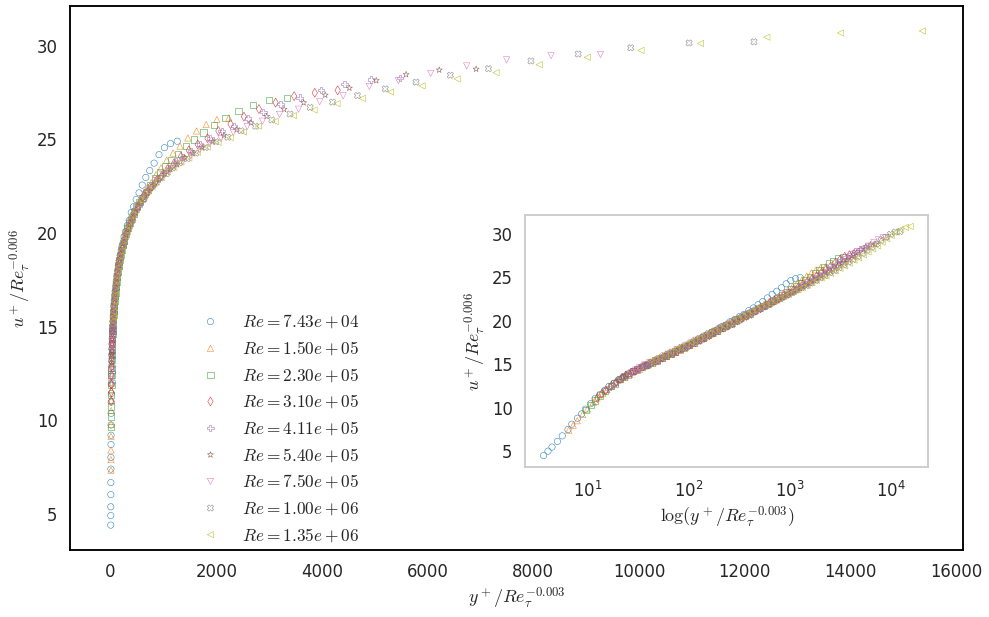

In [8]:
fig, ax1 = plt.subplots(figsize=(16, 10))

left, bottom, width, height = [0.52, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','X','<']
line_width = 0.5

j=0
for i in range(len(dfs)):
    ax1.scatter(y__[i][:-1] , u__[i][:-1] , s=40 , linewidth = line_width , facecolors='none', color = colors[i], marker = markers[j%len(markers)], label = r'$Re= $'+r'${:.2e}$'.format(Re[i]))
    j+=1

j=0
for i in range(len(dfs)):
    ax2.scatter(y__[i][:-1] , u__[i][:-1] , s=40 , linewidth = line_width, facecolors = 'none', color = colors[i] , marker = markers[j%len(markers)], label = 'Mck, Re= '+'{:.2e}'.format(Re[i]))
    j+=1

font = font_manager.FontProperties(family='DejaVu Sans',
                                   weight='roman',
                                   style='normal', size = 'xx-large', stretch = 'ultra-condensed')

ax1.legend(bbox_to_anchor=(0.13, 0.45), loc = 'upper left', edgecolor = 'white', framealpha = 0, prop = font, borderaxespad=0.)
ax1.set_xlabel(r"$y^+/Re_\tau^{-0.003}$")
ax1.set_ylabel(r'$u^+/Re_\tau^{-0.006}$')
#ax1.set_ylim([2,15])
ax1.grid(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax2.set_xlabel(r"$\log(y^+/Re_\tau^{-0.003})$")
ax2.set_ylabel(r'$u^+/Re_\tau^{-0.006}$')
ax2.set_xscale('log')
#ax2.set_xlim([0.01,1])
ax2.grid(False)
plt.savefig('Figures/BarenNet exponents for log layer (Low Reynolds).pdf', format='pdf', dpi=1200)
plt.show()

## Now for High Reynolds

In [12]:
dfs = [dfSB2M300k_M, dfSB3M_M, dfSB4M_M, dfSB6M_M, dfSB7M_M, dfSB10M_M, dfSB13M_M]
Re_tau = []
Y_ = []
U_ = []
possible_re_tau = [4.229500e+004, 5.453000e+004, 7.647800e+004, 1.022e+005, 1.279200e+005, 1.657e+005, 2.169800e+005]
dic_x = {}
dic_y = {}

for i in range(len(possible_re_tau)):
    possible_y = dfs[i]["y+"].values
    possible_u = dfs[i]["U+"].values
    for j in range(len(possible_y)):                                                                    
        if 3 * (possible_re_tau[i] ** (1 / 2)) < possible_y[j] < 0.1 * possible_re_tau[i]:              ### REGION WE WILL LOOK FOR LOG LAYER
            Y_.append(possible_y[j])
            U_.append(possible_u[j])
            Re_tau.append(possible_re_tau[i])

c = list(zip(Y_, Re_tau, U_))
random.shuffle(c)
Y_, Re_tau, U_ = zip(*c)

Y_ = np.log(Y_)
Re_tau = np.log(Re_tau)

dic_x['y+'] = Y_
dic_x['re_tau'] = Re_tau
dic_y['u+'] = np.array(U_)

nonsimilar_keys = ['y+']

xtrain = pd.DataFrame.from_dict(dic_x).values
ytrain = pd.DataFrame.from_dict(dic_y).values

In [13]:
loss = 'mean_squared_error'
optimizer = 'adam'
best_loss = 50.0
n_fits = 20                      # Number of model fits we will try to perform
n_epochs_initial = 100           # Number of epochs we will train inside the loop
n_epochs_final = 10000            # Number of epochs we will train after convergence is established
successfull_tries = 0
models = []

# model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
# model.compile(loss = loss, optimizer = optimizer)
# model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 2)

while successfull_tries < n_fits:
    model = Create_Similarity_Model(n_nonsimilar = n_nonsimilar, n_similar = n_similar)
    model.compile(loss = loss, optimizer = optimizer)
    model.fit(xtrain, ytrain, epochs = n_epochs_initial, verbose = 0)
    current_loss = model.evaluate(xtrain, ytrain, verbose = 0)
    if current_loss < 100:
        successfull_tries += 1
        model.fit(xtrain, ytrain, epochs = n_epochs_final, verbose = 0)
        good_loss = model.evaluate(xtrain, ytrain, verbose = 0)
        models.append(model)
        print("Iteration " + str(successfull_tries) + ": current loss = " + str(good_loss))
        if good_loss < best_loss:
            best_model = model
            best_loss = good_loss

Iteration 1: current loss = 0.03429776057600975
Iteration 2: current loss = 0.009559019468724728
Iteration 3: current loss = 0.010959792882204056
Iteration 4: current loss = 0.016860146075487137
Iteration 5: current loss = 0.010277701541781425
Iteration 6: current loss = 0.02829906716942787
Iteration 7: current loss = 0.03807191178202629
Iteration 8: current loss = 0.013191821984946728
Iteration 9: current loss = 0.01642022095620632
Iteration 10: current loss = 0.009984892792999744
Iteration 11: current loss = 0.010590944439172745
Iteration 12: current loss = 0.016852475702762604
Iteration 13: current loss = 0.013326452113687992
Iteration 14: current loss = 0.011022861115634441
Iteration 15: current loss = 0.009843678213655949
Iteration 16: current loss = 0.015602060593664646
Iteration 17: current loss = 0.012415017932653427
Iteration 18: current loss = 0.019379915669560432
Iteration 19: current loss = 0.008437617681920528
Iteration 20: current loss = 0.013292602263391018


In [14]:
#best_model.fit(xtrain, ytrain, epochs = 1000, verbose = 2)
best_model.evaluate(xtrain, ytrain, verbose = 0)

0.008437617681920528

In [15]:
j = 0

for model in models:

    for i in range(n_nonsimilar):
        similarity_exponents = model.get_layer('similarity_layer_' + str(i+1)).weights[0][0].numpy()
        print('Exponents multiplicating inside the function for model ' + str(j) + ' in ' + nonsimilar_keys[i] + ': ' + str(similarity_exponents))

    multiplication_exponents = model.get_layer('multiplication_layer').weights[0][0].numpy()
    print('Exponents multiplicating outside the function for model ' + str(j) + ': '  + str(multiplication_exponents))
    j += 1

for i in range(n_nonsimilar):
    similarity_exponents = best_model.get_layer('similarity_layer_' + str(i+1)).weights[0][0].numpy()
    print('Exponents multiplicating inside the function for  best model: ' + nonsimilar_keys[i] + ': ' + str(similarity_exponents))

multiplication_exponents = best_model.get_layer('multiplication_layer').weights[0][0].numpy()
print('Exponents multiplicating outside the function for best model: '  + str(multiplication_exponents))

Exponents multiplicating inside the function for model 0 in y+: [-0.7532627]
Exponents multiplicating outside the function for model 0: [0.06869487]
Exponents multiplicating inside the function for model 1 in y+: [-0.93027097]
Exponents multiplicating outside the function for model 1: [0.08567087]
Exponents multiplicating inside the function for model 2 in y+: [-0.7993334]
Exponents multiplicating outside the function for model 2: [0.07266933]
Exponents multiplicating inside the function for model 3 in y+: [-0.940215]
Exponents multiplicating outside the function for model 3: [0.08670137]
Exponents multiplicating inside the function for model 4 in y+: [-0.89950293]
Exponents multiplicating outside the function for model 4: [0.08289397]
Exponents multiplicating inside the function for model 5 in y+: [-0.793639]
Exponents multiplicating outside the function for model 5: [0.07249367]
Exponents multiplicating inside the function for model 6 in y+: [-0.8796846]
Exponents multiplicating outs

In [13]:
scaling_factor_y = 0.97
scaling_factor_u = 0.086

y__ = []
u__ = []
Re_tau = possible_re_tau
Re = [2.36e+006, 3.11e+006, 4.46e+006, 6.11e+006, 7.81e+006, 1.03e+007, 1.37e+007]

for i in range(len(dfs)):
    yplus = dfs[i]['y+']
    uplus = dfs[i]['U+']
    y__.append(yplus / (Re_tau[i] ** scaling_factor_y))
    u__.append(uplus / (Re_tau[i] ** scaling_factor_u))

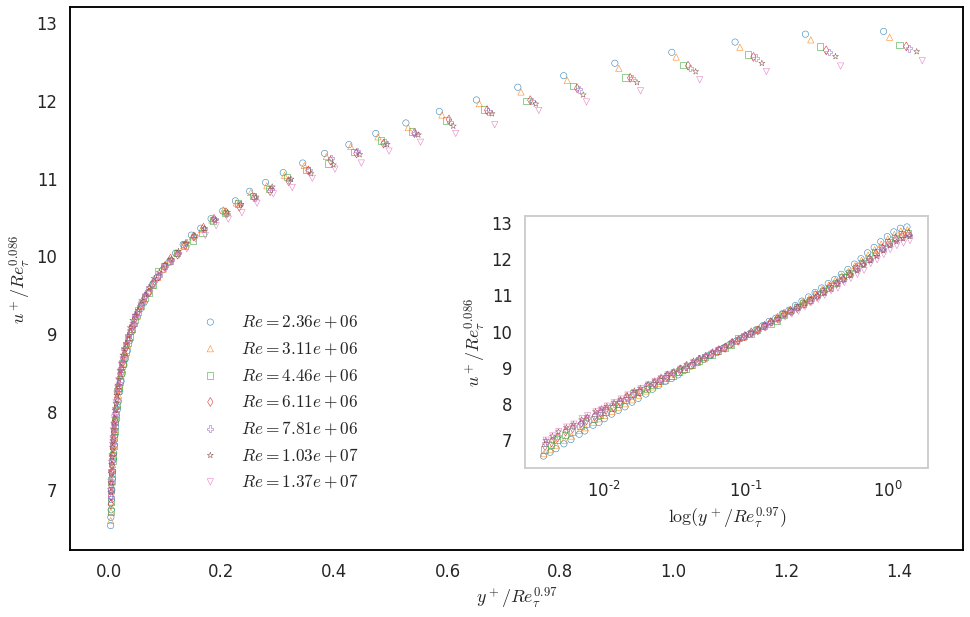

In [15]:
fig, ax1 = plt.subplots(figsize=(16, 10))

left, bottom, width, height = [0.52, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','X','<']
line_width = 0.5

j=0
for i in range(len(dfs)):
    ax1.scatter(y__[i][:-1] , u__[i][:-1] , s=40 , linewidth = line_width , facecolors='none', color = colors[i], marker = markers[j%len(markers)], label = r'$Re= $'+r'${:.2e}$'.format(Re[i]))
    j+=1

j=0
for i in range(len(dfs)):
    ax2.scatter(y__[i][:-1] , u__[i][:-1] , s=40 , linewidth = line_width, facecolors = 'none', color = colors[i] , marker = markers[j%len(markers)], label = 'Mck, Re= '+'{:.2e}'.format(Re[i]))
    j+=1

font = font_manager.FontProperties(family='DejaVu Sans',
                                   weight='roman',
                                   style='normal', size = 'xx-large', stretch = 'ultra-condensed')

ax1.legend(bbox_to_anchor=(0.13, 0.45), loc = 'upper left', edgecolor = 'white', framealpha = 0, prop = font, borderaxespad=0.)
ax1.set_xlabel(r"$y^+/Re_\tau^{0.97}$")
ax1.set_ylabel(r'$u^+/Re_\tau^{0.086}$')
#ax1.set_ylim([2,15])
ax1.grid(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax2.set_xlabel(r"$\log(y^+/Re_\tau^{0.97})$")
ax2.set_ylabel(r'$u^+/Re_\tau^{0.086}$')
ax2.set_xscale('log')
#ax2.set_xlim([0.01,1])
ax2.grid(False)
plt.savefig('Figures/BarenNet exponents for log layer (High Reynolds).pdf', format='pdf', dpi=1200)

In [9]:
dfs = [dfSB75k_M, dfSB150k_M, dfSB230k_M, dfSB310k_M, dfSB410k_M, dfSB540k_M, dfSB750k_M, dfSB1M_M, dfSB1M300k_M, dfSB1M700k_M, dfSB2M300k_M, dfSB3M_M, dfSB4M_M, dfSB6M_M, dfSB7M_M, dfSB10M_M, dfSB13M_M]
Re_tau = []
Y_ = []
U_ = []
possible_re_tau = [1824.7, 3327.4, 5108.6, 6617.4, 8536.6, 10914.0, 14849.0, 19778.0, 25278.0, 32869.0, 4.229500e+004, 5.453000e+004, 7.647800e+004, 1.022e+005, 1.279200e+005, 1.657e+005, 2.169800e+005]
#possible_re_tau = [4.229500e+004, 5.453000e+004, 7.647800e+004, 1.022e+005, 1.279200e+005, 1.657e+005, 2.169800e+005]
dic_x = {}
dic_y = {}

for i in range(len(possible_re_tau)):
    possible_y = dfs[i]["y+"].values
    possible_u = dfs[i]["U+"].values
    print('y+_min / re_tau^{1/2} for re_tau = ' + str(possible_re_tau[i]) + ': ' + str(np.min(possible_y) / (possible_re_tau[i] **(1/2))))
    for j in range(len(possible_y)):                                                                    
        if 3 * (possible_re_tau[i] ** (1 / 2)) < possible_y[j] < 0.2 * possible_re_tau[i]:              ### REGION WE WILL LOOK FOR LOG LAYER
            Y_.append(possible_y[j])
            U_.append(possible_u[j])
            Re_tau.append(possible_re_tau[i])

c = list(zip(Y_, Re_tau, U_))
random.shuffle(c)
Y_, Re_tau, U_ = zip(*c)

Y_ = np.log(Y_)
Re_tau = np.log(Re_tau)

dic_x['y+'] = Y_
dic_x['re_tau'] = Re_tau
dic_y['u+'] = np.array(U_)

nonsimilar_keys = ['y+']

xtrain = pd.DataFrame.from_dict(dic_x).values
ytrain = pd.DataFrame.from_dict(dic_y).values

y+_min / re_tau^{1/2} for re_tau = 1824.7: 0.12406445023331651
y+_min / re_tau^{1/2} for re_tau = 3327.4: 0.16774259354226387
y+_min / re_tau^{1/2} for re_tau = 5108.6: 0.20625546157346872
y+_min / re_tau^{1/2} for re_tau = 6617.4: 0.23628289600672742
y+_min / re_tau^{1/2} for re_tau = 8536.6: 0.26839485700054705
y+_min / re_tau^{1/2} for re_tau = 10914.0: 0.30348398829699064
y+_min / re_tau^{1/2} for re_tau = 14849.0: 0.35399022272234537
y+_min / re_tau^{1/2} for re_tau = 19778.0: 0.40847794031964363
y+_min / re_tau^{1/2} for re_tau = 25278.0: 0.4356296216059095
y+_min / re_tau^{1/2} for re_tau = 32869.0: 0.49821813610529997
y+_min / re_tau^{1/2} for re_tau = 42295.0: 0.5640446374151677
y+_min / re_tau^{1/2} for re_tau = 54530.0: 0.6405112244487076
y+_min / re_tau^{1/2} for re_tau = 76478.0: 0.7581001904034976
y+_min / re_tau^{1/2} for re_tau = 102200.0: 0.8764187960481771
y+_min / re_tau^{1/2} for re_tau = 127920.0: 0.9777188487102015
y+_min / re_tau^{1/2} for re_tau = 165700.0: 1.11